In [1]:
import pandas as pd
from scipy import stats

### Question 1
I belong to a golf club in my neighborhood. I divide the year into three golf seasons: summer (June–September), winter (November–March), and shoulder (October, April, and May). I believe that I play my best golf during the summer (because I have more time and the course isn’t crowded) and shoulder (because the course isn’t crowded) seasons, and my worst golf is during the winter (because when all of the part-year residents show up, the course is crowded, play is slow, and I get frustrated). Data from the last year are shown in the following table.

In [2]:
group1 = [ 83, 85, 85, 87, 90, 88, 88, 84, 91, 90,]   # Summer]
group2 = [ 91, 87, 84, 87, 85, 86, 83,]               # Shoulder]
group3 = [ 94, 91, 87, 85, 87, 91, 92, 86,]            # Winter]


Test whether season has an effect on my golf scores. What is the test statistic?

In [3]:
# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(group1, group2, group3)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")


F-statistic: 2.1214422500338515
P-value: 0.14372166166670017


Do the data indicate that my opinion is correct? Use α = 0.05.

In [4]:
if p_value < 0.05:
    print("Reject the null hypothesis: There are significant differences between group means.")
else:
    print("Fail to reject the null hypothesis: No significant differences found.")

Fail to reject the null hypothesis: No significant differences found.


Analyze the residuals from this experiment and comment on model adequacy.

In [5]:
# Data
data = {
    "Season": ["Summer"] * 10 + ["Shoulder"] * 7 + ["Winter"] * 8,
    "Observations": [
        83, 85, 85, 87, 90, 88, 88, 84, 91, 90,   # Summer
        91, 87, 84, 87, 85, 86, 83,               # Shoulder
        94, 91, 87, 85, 87, 91, 92, 86            # Winter
    ]
}
df = pd.DataFrame(data)

In [6]:
group_mean = df.groupby("Season")["Observations"].transform("mean")
df["fitted"] = group_mean
df["error"] = df["Observations"] - group_mean

In [7]:
df

,Season,Observations,fitted,error
0,Summer,83,87.100000,-4.100000
1,Summer,85,87.100000,-2.100000
2,Summer,85,87.100000,-2.100000
3,Summer,87,87.100000,-0.100000
4,Summer,90,87.100000,2.900000
5,Summer,88,87.100000,0.900000
6,Summer,88,87.100000,0.900000
7,Summer,84,87.100000,-3.100000
8,Summer,91,87.100000,3.900000
9,Summer,90,87.100000,2.900000


### 1. Residuals vs. Fitted values

This checks if residuals are randomly scattered (no pattern = good).

Check: constant variance assumption and independence assumption

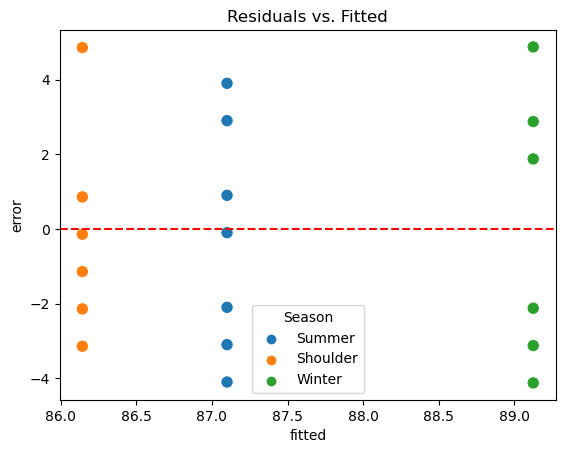

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats



# Plot
sns.scatterplot(x="fitted", y="error", hue="Season", data=df, s=80)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals vs. Fitted")
plt.show()


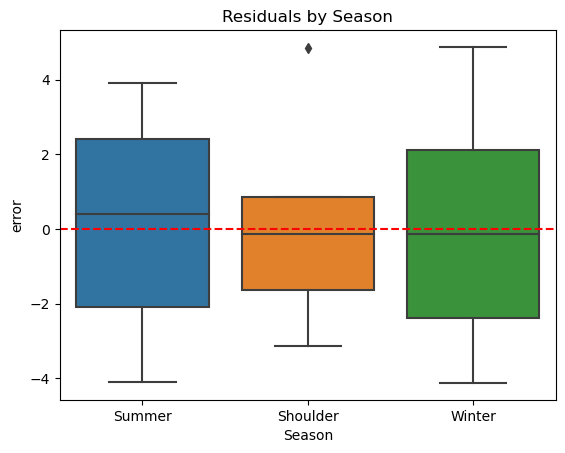

In [9]:
sns.boxplot(x="Season", y="error", data=df)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals by Season")
plt.show()


Check normality assumption

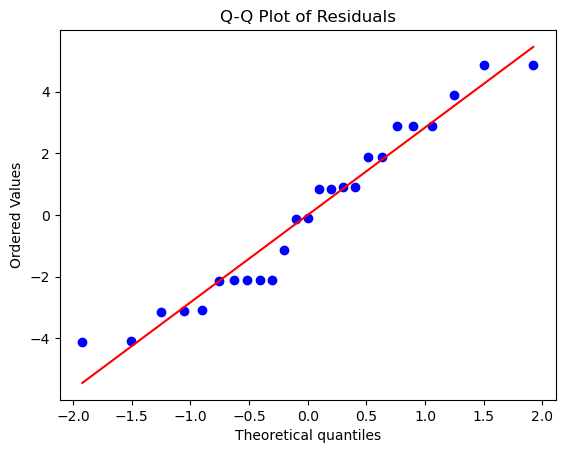

In [10]:
stats.probplot(df["error"], dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()
